Опис атрибутів датасету nba:
*   Name: Ім'я гравця.
*   GP: Кількість ігор.
*   MIN: Середня кількість хвилин на майданчику.
*   PTS: Середня кількість очок за гру.
*   FGM: Середня кількість вдалих полів.
*   FGA: Середня кількість спроб на полях.
*   FG%: Відсоток вдалих полів.
*   3P Made: Середня кількість трьохочкових.
*   3PA: Середня кількість спроб трьохочкових.
*   3P%: Відсоток вдалих трьохочкових.
*   FTA: Середня кількість спроб штрафних.
*   FT%: Відсоток вдалих штрафних.
*   OREB: Середня кількість атакувальних підбирань.
*   DREB: Середня кількість захисних підбирань.
*   REB: Загальна кількість підбирань.
*   AST: Середня кількість асистів.
*   STL: Середня кількість перехоплень.
*   BLK: Середня кількість блокшотів.
*   TOV: Середня кількість втрат м'яча.
*   TARGET_5Yrs: Цільова змінна (0 — не залишиться, 1 — залишиться в НБА через 5 років).





In [2]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.classification import setup, compare_models, evaluate_model, save_model, load_model, predict_model
from sklearn.metrics import classification_report, confusion_matrix

# Завантаження датасету nba
nba = get_data('nba')

# Перевірка на пропущені значення
nba.isnull().sum()

# Видалення пропущених значень для цільової змінної 'TARGET_5Yrs'
nba_clean = nba.dropna(subset=['TARGET_5Yrs'])

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [3]:
# Налаштування PyCaret для задачі класифікації
clf_setup = setup(data=nba_clean, target='TARGET_5Yrs', session_id=123, normalize=True)

# Порівняння моделей
best_model = compare_models()

# Оцінка моделі
evaluate_model(best_model)

,Description,Value
0,Session id,123
1,Target,TARGET_5Yrs
2,Target type,Binary
3,Original data shape,"(1340, 21)"
4,Transformed data shape,"(1340, 21)"
5,Transformed train set shape,"(937, 21)"
6,Transformed test set shape,"(403, 21)"
7,Numeric features,19
8,Categorical features,1
9,Rows with missing values,0.8%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6490,0.6394,0.9502,0.6482,0.7705,0.1261,0.1827,0.0770
rf,Random Forest Classifier,0.6254,0.5226,0.9760,0.6274,0.7636,0.0355,0.0801,0.2960
qda,Quadratic Discriminant Analysis,0.6244,0.6630,0.9862,0.6249,0.7650,0.0244,0.0684,0.1240
nb,Naive Bayes,0.6233,0.7410,0.9604,0.6287,0.7583,0.0389,0.0850,0.1170
ridge,Ridge Classifier,0.6233,0.4488,0.9846,0.6245,0.7642,0.0223,0.0631,0.0660
lda,Linear Discriminant Analysis,0.6222,0.4306,0.9846,0.6238,0.7637,0.0189,0.0514,0.0810
lr,Logistic Regression,0.6201,0.5965,0.9828,0.6227,0.7623,0.0135,0.0426,0.7600
dummy,Dummy Classifier,0.6201,0.5000,1.0000,0.6201,0.7655,0.0000,0.0000,0.0620
lightgbm,Light Gradient Boosting Machine,0.6190,0.4774,0.9587,0.6258,0.7571,0.0279,0.0580,0.5250
et,Extra Trees Classifier,0.6180,0.5743,0.9794,0.6219,0.7607,0.0092,0.0212,0.2140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [4]:
# Збереження кращої моделі
save_model(best_model, 'best_model_nba.pkl')

# Завантаження збереженої моделі
model = load_model('best_model_nba.pkl')

# Прогнозування за допомогою моделі
predictions = predict_model(model, nba_clean)

# Показ результатів прогнозів
predictions.head()

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8761,0.9027,0.9759,0.8474,0.9072,0.7238,0.7403


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,prediction_label,prediction_score
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.700001,0.5,2.1,25.0,...,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,0,1.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.600000,0.7,2.8,23.5,...,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,1,0.6
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.200001,0.4,1.7,24.4,...,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,1,1.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.599998,0.1,0.5,22.6,...,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,1,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.400002,0.0,0.1,0.0,...,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,1,1.0


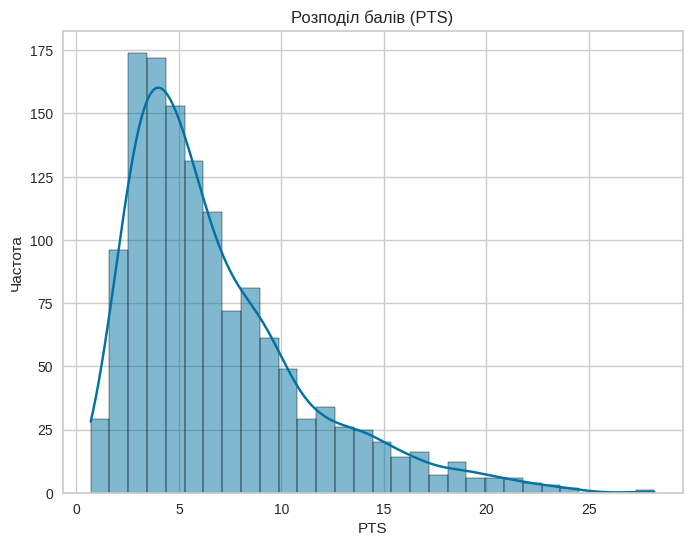

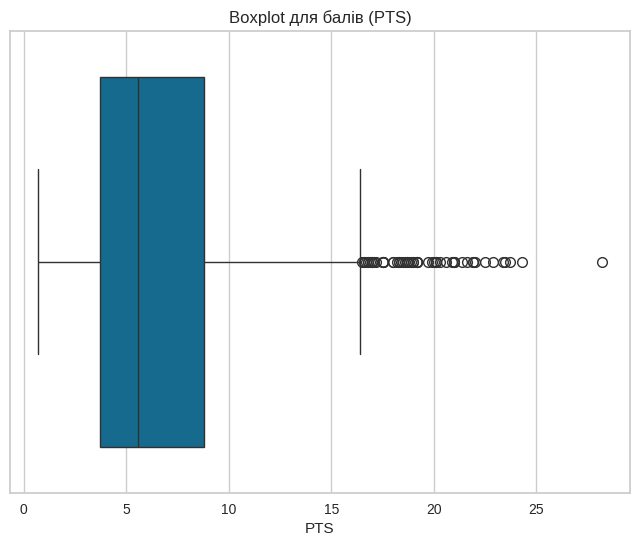

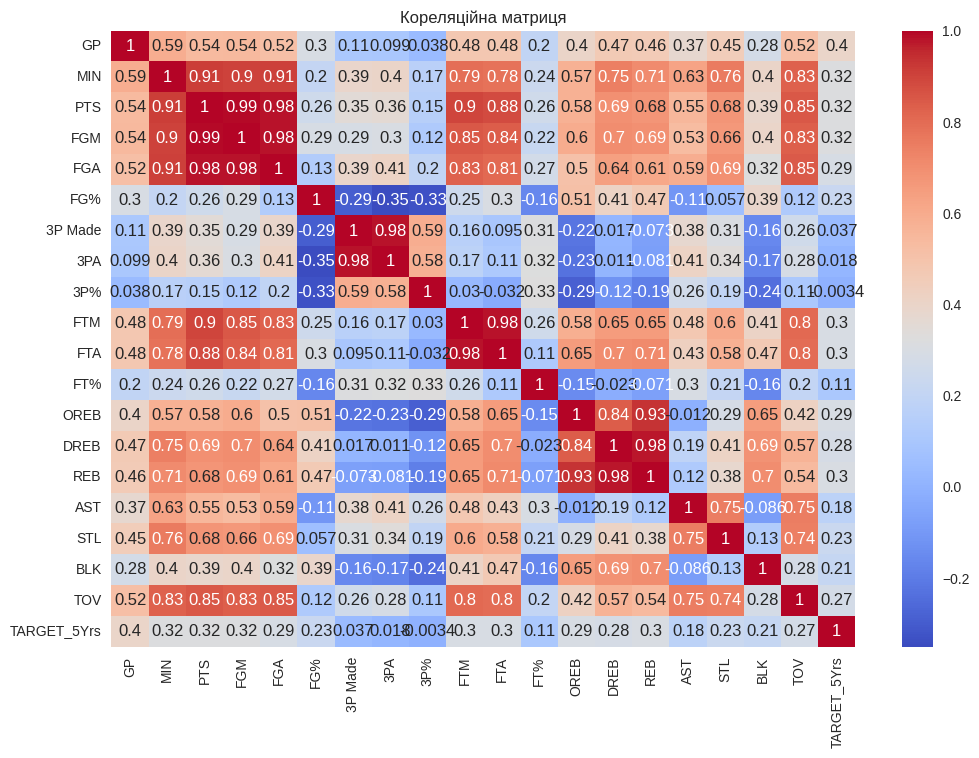

In [7]:
# Гістограма для змінної "PTS" (балів)
plt.figure(figsize=(8,6))
sns.histplot(nba_clean['PTS'], kde=True)
plt.title("Розподіл балів (PTS)")
plt.xlabel("PTS")
plt.ylabel("Частота")
plt.show()

# Boxplot для змінної "PTS"
plt.figure(figsize=(8,6))
sns.boxplot(x=nba_clean['PTS'])
plt.title("Boxplot для балів (PTS)")
plt.show()

# Виключення текстових стовпців для кореляційної матриці
nba_numeric = nba_clean.select_dtypes(include=['float64', 'int64'])

# Кореляційна матриця для числових змінних
plt.figure(figsize=(12,8))
sns.heatmap(nba_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Кореляційна матриця")
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

nba_clean = nba.dropna()
# Розділяємо дані на вхідні ознаки та цільову змінну
X = nba_clean.drop(columns=['TARGET_5Yrs', 'Name'])
y = nba_clean['TARGET_5Yrs']

# Розділяємо на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Створення моделі
model = LogisticRegression(max_iter=1000)

# Тренування моделі
model.fit(X_train, y_train)

# Прогнозування на тестовій вибірці
y_pred = model.predict(X_test)


Accuracy: 0.7368
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        90
           1       0.79      0.82      0.81       176

    accuracy                           0.74       266
   macro avg       0.70      0.70      0.70       266
weighted avg       0.73      0.74      0.73       266



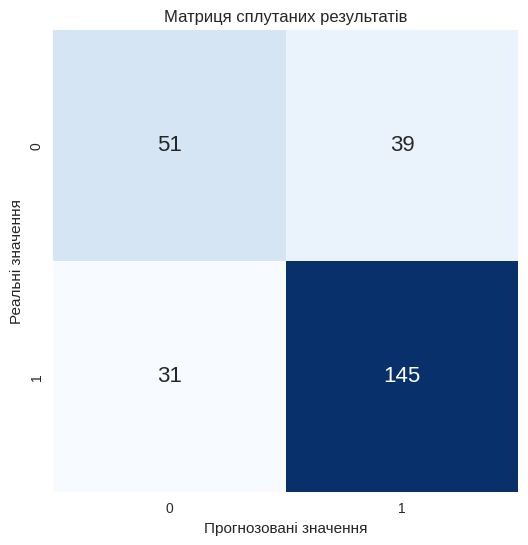

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Побудова матриці сплутаних результатів
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Матриця сплутаних результатів')
plt.ylabel('Реальні значення')
plt.xlabel('Прогнозовані значення')
plt.show()


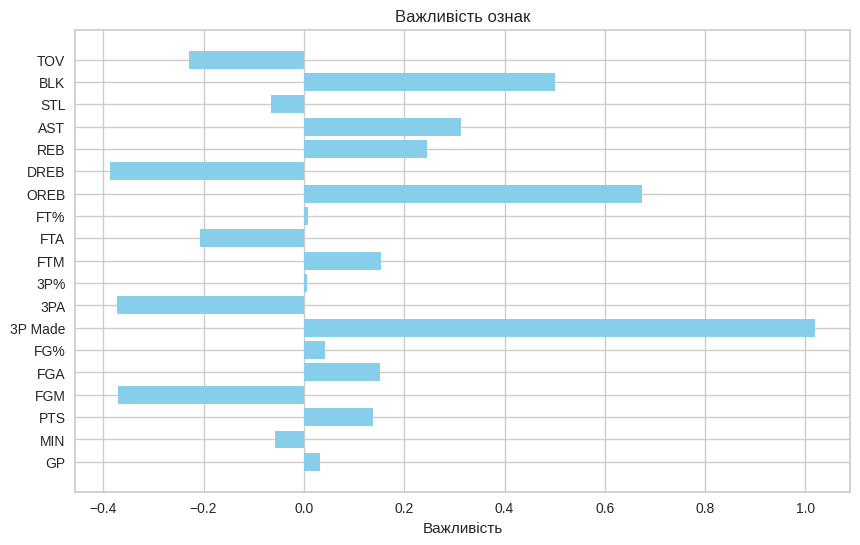

In [22]:
# Виведемо коефіцієнти для логістичної регресії (важливість ознак)
feature_importance = model.coef_[0]
features = X.columns

# Побудова графіку важливості ознак
plt.figure(figsize=(10,6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Важливість')
plt.title('Важливість ознак')
plt.show()
